In [1]:
%cd ..

/Users/brewer/Code/Eric/ericrobertbrewer/python


# resume_timeline

Adapted from StackOverflow: [Timeline bar graph using python and matplotlib](https://stackoverflow.com/questions/51505291/timeline-bar-graph-using-python-and-matplotlib)

In [2]:
import datetime as dt

from matplotlib import dates as mdates
from matplotlib import font_manager
from matplotlib import pyplot as plt
from matplotlib.collections import PolyCollection
from matplotlib.lines import Line2D

In [3]:
OUTPUT_DIR = 'output'

FONT_PATH = '/Users/brewer/Library/Fonts/'
FONT_NAME = 'Droid Serif'

for font in font_manager.findSystemFonts(fontpaths=FONT_PATH, fontext='ttf'):
    font_manager.fontManager.addfont(font)

font_manager.findfont(FONT_NAME)

'/Users/brewer/Library/Fonts/DroidSerif-Regular.ttf'

In [4]:
CATEGORY_WORK = 'Work'
CATEGORY_SCHOOL = 'Education'
CATEGORY_VOLUNTEER = 'Volunteer'
CATEGORIES = [CATEGORY_VOLUNTEER, CATEGORY_WORK, CATEGORY_SCHOOL]
CATEGORY_TO_INDEX = {c: i for i, c in enumerate(CATEGORIES)}
CATEGORY_TO_COLOR = {c: 'C{:d}'.format(i) for i, c in enumerate(CATEGORIES)}

stints = [
    (dt.date(2008,  9,  4), dt.date(2012,  5, 12), 'BS @ SSU', CATEGORY_SCHOOL),
    (dt.date(2012,  4, 16), dt.date(2013,  8, 11), 'Carmel', CATEGORY_WORK),
    (dt.date(2013,  9, 25), dt.date(2015,  9,  9), 'Mission', CATEGORY_VOLUNTEER),
    (dt.date(2016,  2,  2), dt.date(2016,  7, 18), 'Gaia', CATEGORY_WORK),
    (dt.date(2016,  8, 10), dt.date(2017, 12, 20), 'Autonet', CATEGORY_WORK),
    (dt.date(2017,  9,  4), dt.date(2020,  6, 18), 'MS @ BYU', CATEGORY_SCHOOL),
    (dt.date(2019, 11, 11), dt.date(2022,  8,  9), 'FamilySearch', CATEGORY_WORK),
    (dt.date(2022,  8, 25), dt.date(2025,  2, 13), 'PhD @ UU', CATEGORY_SCHOOL)
]

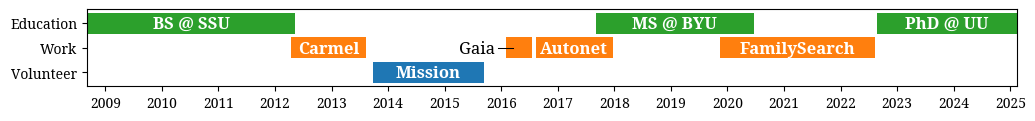

In [5]:
corners = list()
colors = list()
for stint in stints:
    y = CATEGORY_TO_INDEX[stint[3]] + 1
    corners.append(((mdates.date2num(stint[0]), y - 0.425),
                    (mdates.date2num(stint[1]), y + 0.425)))
    colors.append(CATEGORY_TO_COLOR[stint[3]])

polygons = [((x0, y0), (x0, y1), (x1, y1), (x1, y0)) for (x0, y0), (x1, y1) in corners]
bars = PolyCollection(polygons, closed=True, facecolors=colors)

fig, ax = plt.subplots(figsize=(12, 1))
ax.add_collection(bars)
ax.autoscale()

locator = mdates.YearLocator()
formatter = mdates.AutoDateFormatter(locator)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
plt.xticks(fontname=FONT_NAME)
ax.set_xlim(left=corners[0][0][0], right=corners[-1][1][0])

ax.set_yticks(list(range(1, 4)))
ax.set_yticklabels(CATEGORIES, fontname=FONT_NAME)

fontdict = {'color': 'white', 'fontfamily': FONT_NAME, 'fontsize': 12, 'fontweight': 'bold'}
fontdict_outer = {'color': 'black', 'fontfamily': FONT_NAME, 'fontsize': 12, 'fontweight': 'normal'}
for i, stint in enumerate(stints):
    corner = corners[i]
    if i == 3:
        # "Gaia" doesn't fit.
        x = corner[0][0] - 75
        y = CATEGORY_TO_INDEX[stint[3]] + 0.95
        ax.text(x, y, stint[2], fontdict=fontdict_outer, ha='right', va='center')
        w = corner[1][0] - corner[0][0]
        h = corner[1][1] - corner[0][1]
        y_line = corner[0][1] + 0.5 * h
        ax.add_line(Line2D((x + 25, corner[0][0] + 0.25 * w), (y_line, y_line), linewidth=0.75, color='black'))
    else:
        x = (corner[0][0] + corner[1][0]) / 2
        y = CATEGORY_TO_INDEX[stint[3]] + 0.95
        ax.text(x, y, stint[2], fontdict=fontdict, ha='center', va='center')

plt.savefig(os.path.join(OUTPUT_DIR, 'timeline.png'), bbox_inches='tight', pad_inches=0.05)
plt.show()